## Prueba de Conocimientos Ciencia de Datos 01

En este notebook puedes utilizar todas las librerias con las que hemos trabajado.

### Ejercicio 1:

_**url** = https://www.20minutos.es/_

Vamos a hacer Web Scraping de las primeras 3 paginas de las categorias de noticias: **Ciencia**, **Deporte**, **Gente**, **Economía**, **Madrid** y **Opinión**.

Y de cada noticia/articulo vamos a obtener:

- **Titulo**
- **Hora**
- **Fecha**
- **Autor**
- **Texto completo**
- **Categoria (columna objetivo)**

**Sustituir con NaN's en el caso de que no se pueda extraer alguno de esos datos anteriores.**

Genera un DataFrame con esta información y guardalo en el archivo **`20minutos_1.csv`**.

In [1]:
import requests 

from bs4 import BeautifulSoup

from selenium import webdriver

from time import sleep

from helium import *
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'helium'

In [ ]:
s=Service(ChromeDriverManager().install())
browser = webdriver.Chrome(r"C:\Chrome\chromedriver.exe") #Abre el navegador

browser.get("https://www.20minutos.es/") #Entra en 20minutos

browser.maximize_window() #Maximiza la ventana del navegador



====== WebDriver manager ======
Current google-chrome version is 99.0.4844
Get LATEST chromedriver version for 99.0.4844 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\jorge\.wdm\drivers\chromedriver\win32\99.0.4844.51]


In [ ]:
def obtenerUrlsNoticias(url_base, categorias, num_paginas):
    lista_urls = []
    #Recorremos las páginas
    for i in range(1, num_paginas + 1):
        for categoria in categorias:
            #Elaboramos la página a la que hay que acceder
            url = f"{url_base}{categoria}/{i}/"

            #Obtener el response de la página con Helium sin abrir navegador
            browser = helium.start_chrome(url, headless = True)
            sleep(5)

            #Extraemos el html y lo pasamos a objeto bs4
            soup = BeautifulSoup(browser.page_source, "html.parser")

            #Recorremos el html para extraer las noticias
            for bs in soup.find_all("div", class_ = "media-content"):

                #Accedemos al enlace del atributo "href" de la etiqueta "a"
                enlace = bs.find("a")["href"]

                #Sólo incluimos en la lista si el enlace incluye "noticia"
                if (("noticia" in enlace) or (categoria in enlace)) and ("/imagenes/" not in enlace):
                    lista_urls.append(enlace)
                    
    return lista_urls



In [ ]:
categorias = ["deportes"] # ["deportes", "ciencia", "gente", "economia", "madrid", "opinion"]

urls = obtenerUrlsNoticias("https://www.20minutos.es/",categorias,1) # 3

informacion = []

for url in urls:
    print(url)
    browser = helium.start_chrome(url, headless = True)
    sleep(3)
    html = BeautifulSoup(browser.page_source, "html.parser")
    
    title = html.find('title')
    for bs in html.find_all("span", class_ = "article-author"):
        autor = bs.find('strong')
    
    for bs in html.find_all("div", class_ ="article-text"):
        texto = bs.get_text()
        
    for bs in html.find_all("span", class_ ="article-date"):
        dia = bs.get_text().split(' - ')[0]
        hora = bs.get_text().split(' - ')[1]

    for bs in html.find_all("ul", class_ = "section-menu-small"):
        cats = bs.get_text()
    
    informacion.append({
        "titulo": title.string.strip(),
        "hora": hora,
        "autor": autor.string,
        "fecha": dia,
        "texto": texto,
        "categoria": cats
    })
    
    
dfObj = pd.DataFrame(informacion)
    
dfObj.to_csv('20minutos_1.csv')

https://www.20minutos.es/deportes/noticia/4976583/0/alpine-motor-alonso-libres-gp-arabia-saudi/
https://www.20minutos.es/deportes/noticia/4976626/0/atentado-misiles-yemen-terroristas-gp-arabia-saudi-formula-1/
https://www.20minutos.es/deportes/noticia/4976616/0/gareth-bale-carta-prensa-parasitos/
https://www.20minutos.es/deportes/noticia/4976686/0/hazard-quirofano-operacion-lesion-pierna-derecha/
https://www.20minutos.es/deportes/noticia/4976554/0/muere-padre-diego-simeone/
https://www.20minutos.es/deportes/noticia/4976280/0/muere-gimnasta-ucraniana-once-anos-misil-ruso-mariupol/
https://www.20minutos.es/deportes/noticia/4976381/0/lequipe-barcelona-intenta-fichaje-kylian-mbappe/
https://www.20minutos.es/deportes/noticia/4976717/0/nick-kyrgios-multa-raqueta-rafa-nadal-indian-wells/
https://www.20minutos.es/deportes/noticia/4976666/0/coe-acuerdo-juegos-olimpicos-invierno-pirineo-2030-aragon-niega/
https://www.20minutos.es/deportes/noticia/4976220/0/mike-tyson-apunta-pistola-club-monologo

- Escribe el código para sacar la información de las primeras 5 páginas de todas las categorias:
    - **Andalucia**, **Valencia**, **Animaleros**, **Cataluña**, **Nacional**, **Vivienda**, **Internacional**, **Cultura**, **Empleo**, **Ciencia**, **Deporte**, **Gente**, **Economía**, **Madrid** y **Opinión**.

. Guarda esta información en el archivo **`20minutos_2.csv`**.

In [ ]:
categorias = [ "Andalucia", "Valencia", "Animaleros", "Cataluña", "Nacional", "Vivienda", "Internacional", "Cultura", "Empleo", "Ciencia", "Deporte", "Gente", "Economía", "Madrid" , "Opinión"]

urls = obtenerUrlsNoticias("https://www.20minutos.es/",categorias,5) # 5

informacion = []

for url in urls:
    print(url)
    browser = helium.start_chrome(url, headless = True)
    sleep(3)
    html = BeautifulSoup(browser.page_source, "html.parser")
    
    title = html.find('title')
    for bs in html.find_all("span", class_ = "article-author"):
        autor = bs.find('strong')
    
    for bs in html.find_all("div", class_ ="article-text"):
        texto = bs.get_text()
        
    for bs in html.find_all("span", class_ ="article-date"):
        dia = bs.get_text().split(' - ')[0]
        hora = bs.get_text().split(' - ')[1]

    for bs in html.find_all("ul", class_ = "section-menu-small"):
        cats = bs.get_text()
    
    informacion.append({
        "titulo": title.string.strip(),
        "hora": hora,
        "autor": autor.string,
        "fecha": dia,
        "texto": texto,
        "categoria": cats
    })
    
    
dfObj = pd.DataFrame(informacion)
    
dfObj.to_csv('20minutos_2.csv')


NameError: name 'obtenerUrlsNoticias' is not defined

- **Escribe el código para sacar la información de todas las categorias del ejercicio anterior pero solo del mes de marzo. Guarda esta información en el archivo `20minutos_3.csv`.**

- **Elige el articulo que más te interese de todos los articulos extraidos, muestra en un WordCloud las palabras más repetidas eliminando los stopwords.**

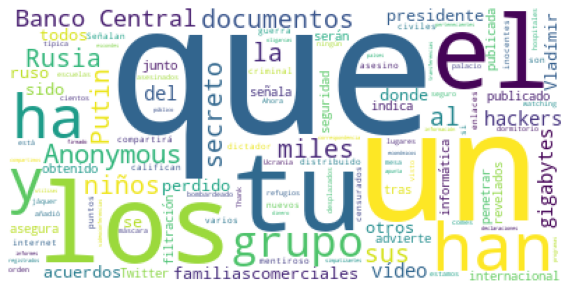

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
stopwords = STOPWORDS

stopwords

stopwords.add("a")
stopwords.add("ante") 
stopwords.add("cabe") 
stopwords.add("contra") 
stopwords.add("de") 
stopwords.add("desde") 
stopwords.add("bajo") 
stopwords.add("con") 
stopwords.add("de") 
stopwords.add("desde") 
stopwords.add("durante") 
stopwords.add("en") 
stopwords.add("entre") 
stopwords.add("hacia") 
stopwords.add("hasta") 
stopwords.add("mediante")
stopwords.add("para")
stopwords.add("por")
stopwords.add("según")
stopwords.add("sobre")
stopwords.add("sin")


with open("anonimus.txt", "r", encoding = "UTF-8") as file:
    anonimus_novel = file.read()

anonimus_wc = WordCloud(background_color = "white",
                     max_words = len(anonimus_novel),
                     stopwords = stopwords)

anonimus_wc.generate(anonimus_novel)

plt.subplots(figsize = (10, 10))
plt.imshow(anonimus_wc)
plt.axis("off")
plt.show()

- Define una función que eliga al azar **`n`** artículos al azar del fichero **`20minutos_1.csv`** y que muestre para cada articulo:
    - **Titulo, fecha y el WordCloud.**
    
Prueba la función con **`n = 5`**

In [ ]:


def elegir_aleatorio ():
    df = pd.read_csv("20minutos_1.csv")
    df =df.sample()

    print(df["titulo"].values)
    print(df["fecha"].values)
   
    print ("Esta es la conbinacion de las palabras de Texto.".format(len(text)))

    stopwords = set(STOPWORDS)
    stopwords.update(["sin","a","ante","cabe","contra","de","desde","bajo","con","de","desde","durante","en","entre","hacia","hasta","mediante","para","por","según","sobre"])



    wordcloud = WordCloud(stopwords=stopwords, background_color="red", width=800, height=400).generate(text)


    plt.figure( figsize=(40,20))
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

elegir_aleatorio()

['Hamraoui, la jugadora del PSG que fue agredida, denuncia acoso de sus compañeras: "Alteran su salud mental"']
['24.03.2022']


NameError: name 'text' is not defined

There are 2886 words in the combination of all cells in column BLOOM.


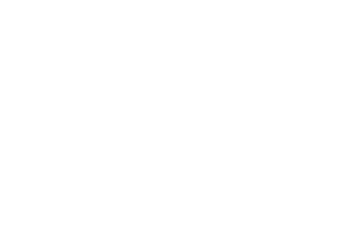

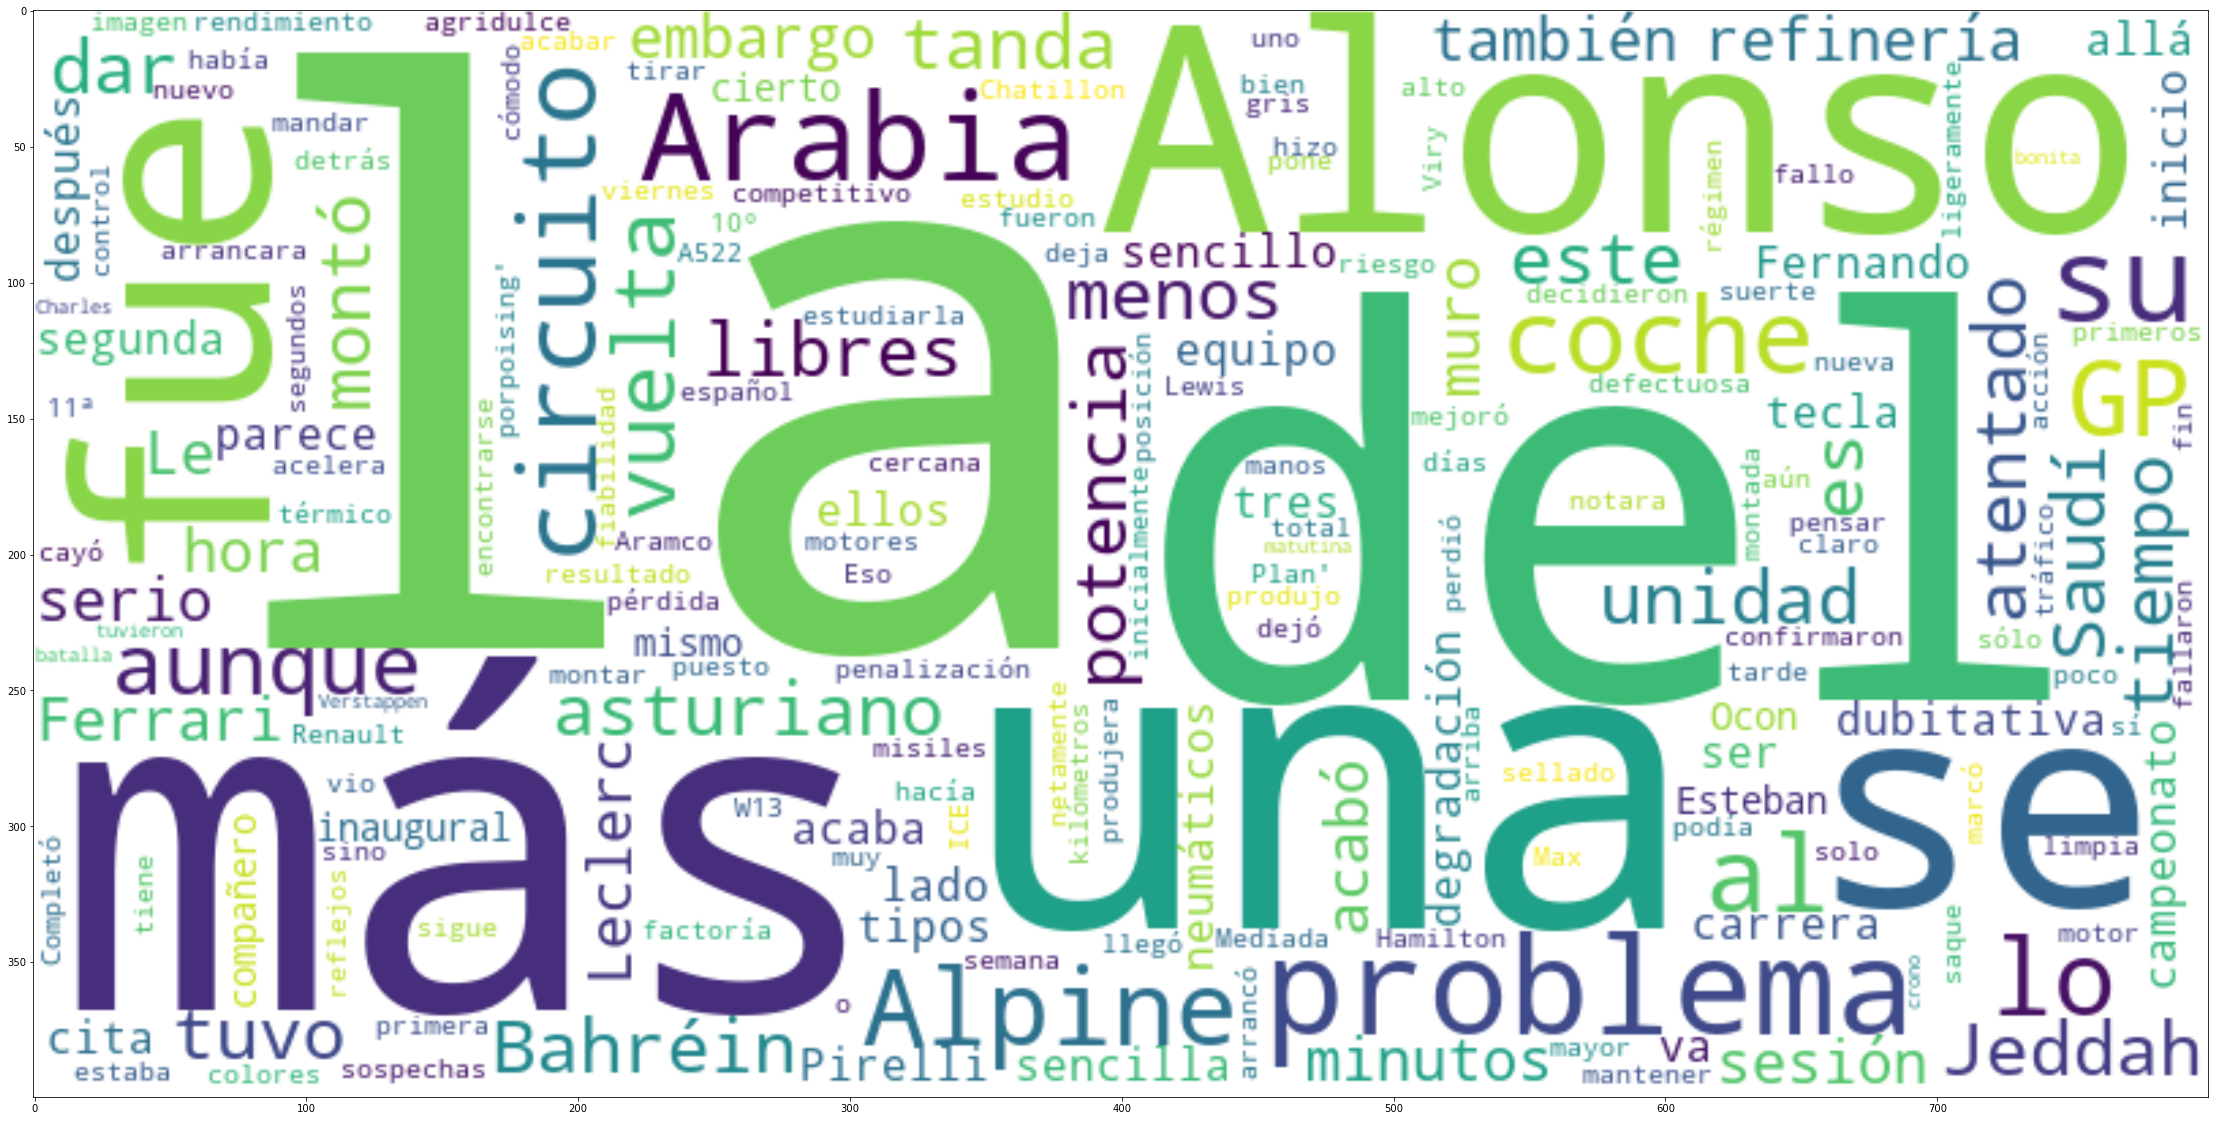

In [ ]:
# Python program to generate WordCloud for column BLOOM

# Text of all words in column bloom

text = " ".join(review for review in df.texto.astype(str))
print ("There are {} words in the combination of all cells in column BLOOM.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["bloom", "rose", "petals", "Average", "diameter","flushes", 'throughout', "Blooms", "form"])


wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
df["titulo"].values

TypeError: 'method' object is not subscriptable